# Combine two dataframe

 - load the data in the file data/gapminder_lifeexpectancy.xlsx
 - select a year of your choice
 - create an separate DataFrame that has two columns: country and continent, and manually fill it with data for 10-20 countries
 - merge both DataFrames
 - remove all rows with empty values
 - print the highest and lowest fertility for each continent

In [1]:
import pandas as pd
df =pd.read_excel("gapminder_lifeexpectancy.xlsx", index_col=0)

In [2]:
df.head()

df = df[2013]
df = pd.DataFrame(df)
df

,2013
Life expectancy,
Abkhazia,NaN
Afghanistan,54.8
Akrotiri and Dhekelia,NaN
Albania,77.7
Algeria,76.3
...,...
Yugoslavia,NaN
Zambia,55.6
Zimbabwe,55.7


In [3]:
country = ["Iran", "Germany","Spain", "Zambia", "Cameroon","China", "Japan", "Australia", "Portugal", "Canada","Mexico"]
continent = ["Asia","Europe", "Europe", "Africa","Africa", "Asia","Asia", "Oceania", "Europe","America","America" ]

In [4]:
df2 = pd.DataFrame({"Life expectancy":country, "Continant":continent})

In [5]:
df2 = df2.set_index("Life expectancy")

df2


,Continant
Life expectancy,
Iran,Asia
Germany,Europe
Spain,Europe
Zambia,Africa
Cameroon,Africa
China,Asia
Japan,Asia
Australia,Oceania
Portugal,Europe


In [12]:
df3 = pd.merge(df2,df,  how="left", left_index=True, right_index=True)
df3= df3.reset_index()
df3 = df3.rename(columns ={"Life expectancy":"Country", 2013:"Life expectency in 2013"})
df3

,Country,Continant,Life expectency in 2013
0,Iran,Asia,74.5
1,Germany,Europe,80.7
2,Spain,Europe,82.5
3,Zambia,Africa,55.6
4,Cameroon,Africa,59.0
5,China,Asia,75.7
6,Japan,Asia,83.0
7,Australia,Oceania,82.4
8,Portugal,Europe,80.7
9,Canada,America,81.6


In [13]:
df3["Continant"].max()

'Oceania'

In [14]:
df3["Continant"].min()

'Africa'

In [15]:
import matplotlib.pyplot as plt

In [21]:
df4 = df3.groupby(by="Continant")["Life expectency in 2013"].mean()

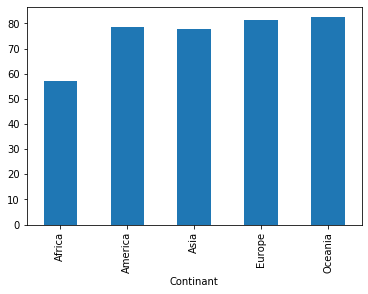

In [22]:
df4.plot.bar()